# 线性回归 boston房价预测
导入相关包

In [258]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [259]:
# 加载csv数据集
data = pd.read_csv("house_data.csv")

In [260]:
# 提取输入特征 (X) 和标签 (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)  # Reshape y to a column vector

In [261]:
# 标准化输入特征，查询用法及原因
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [262]:
# 利用train_test_split 函数将数据集划分为训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, random_state = 0)

将数据转换为 PyTorch 张量

In [263]:
X = torch.tensor(X)
X_test = torch.tensor(X_test)
y = torch.tensor(y)
y_test = torch.tensor(y_test)

In [264]:
# 创建用于批量训练的 DataLoader
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

利用pytorch封装好的nn.Module创建LinearRegression模型

In [265]:
# 定义一个简单的线性回归模型
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )
            #定义线性回归层

    def forward(self, x):
        out = self.layers(x)
        return out
            #定义计算图传播

In [266]:
# 初始化模型
model = LinearRegression(input_dim=X.shape[1])

# 定义损失函数和优化器
criterion = nn.MSELoss()
# 可以尝试多种优化方法和学习率
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 创建一个StepLR调度器
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

In [267]:
# 训练循环
num_epochs = 1000
iters, train_costs = [], []

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # # 前向传播
        y_pred = model.layers(batch_X.float())
        # 计算loss
        loss = criterion(y_pred,batch_y.float())
        # 反向传播和优化：(1) 梯度归零
        optimizer.zero_grad()
        #               (2) 反向传播计算每个参数的梯度
        loss.backward()
        #               (3) 通过梯度下降更新参数
        optimizer.step()

        train_costs.append(loss.item())

        # 打印输出训练进度
        if len(train_costs) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{len(train_costs)}], Loss: {loss.item():.4f}")
        # 在每个epoch结束后，调用scheduler的step方法来降低学习率
        scheduler.step()

Epoch [9/1000], Step [100], Loss: 0.1040
Epoch [17/1000], Step [200], Loss: 0.1590
Epoch [25/1000], Step [300], Loss: 0.0569
Epoch [34/1000], Step [400], Loss: 0.0441
Epoch [42/1000], Step [500], Loss: 0.2931
Epoch [50/1000], Step [600], Loss: 0.1877
Epoch [59/1000], Step [700], Loss: 0.0748
Epoch [67/1000], Step [800], Loss: 0.0596
Epoch [75/1000], Step [900], Loss: 0.0593
Epoch [84/1000], Step [1000], Loss: 0.0983
Epoch [92/1000], Step [1100], Loss: 0.0584
Epoch [100/1000], Step [1200], Loss: 0.0557
Epoch [109/1000], Step [1300], Loss: 0.1413
Epoch [117/1000], Step [1400], Loss: 0.1398
Epoch [125/1000], Step [1500], Loss: 0.0848
Epoch [134/1000], Step [1600], Loss: 0.1309
Epoch [142/1000], Step [1700], Loss: 0.0542
Epoch [150/1000], Step [1800], Loss: 0.0726
Epoch [159/1000], Step [1900], Loss: 0.0736
Epoch [167/1000], Step [2000], Loss: 0.1350
Epoch [175/1000], Step [2100], Loss: 0.1217
Epoch [184/1000], Step [2200], Loss: 0.1071
Epoch [192/1000], Step [2300], Loss: 0.1145
Epoch [20

保存模型

In [268]:
torch.save(model,'model1.pth')

打印输出模型参数w和b

In [269]:
# [w,b] = model.parameters()
# print(w,b)

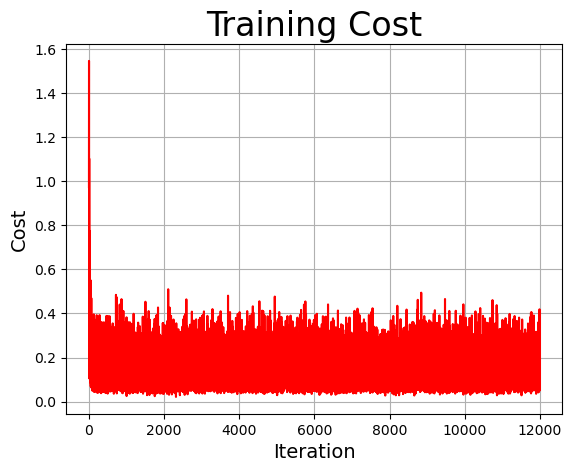

In [270]:
# 绘制训练过程
iters = list(range(1, len(train_costs) + 1))
plt.plot(iters, train_costs, color='red', label='training cost')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Training Cost", fontsize=24)
plt.grid()
plt.show()

对测试集进行预测

In [271]:
# 设置模型为评估模式
model.eval()

LinearRegression(
  (layers): Sequential(
    (0): Linear(in_features=13, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [272]:
with torch.no_grad():
    #输出预测值predictions
    predictions = model(X.float())
    print(predictions)

tensor([[-3.9767e-01],
        [-3.3934e-01],
        [ 1.3577e+00],
        [-6.6237e-01],
        [-1.4856e+00],
        [-6.6063e-01],
        [-2.7252e-01],
        [-1.3735e+00],
        [ 1.1166e+00],
        [-7.9454e-02],
        [-9.0681e-01],
        [ 2.7625e-01],
        [-1.8328e+00],
        [-1.3207e+00],
        [-2.5341e-01],
        [ 1.2453e+00],
        [ 6.2360e-01],
        [ 1.5153e-01],
        [-5.2748e-01],
        [ 1.0533e+00],
        [ 1.0273e+00],
        [-1.1459e+00],
        [-1.3114e+00],
        [ 7.0396e-01],
        [ 3.7584e-01],
        [-1.1820e+00],
        [ 4.7731e-01],
        [-7.6451e-01],
        [ 6.0418e-01],
        [-3.5645e-01],
        [-6.7263e-01],
        [-3.8575e-01],
        [-6.9612e-01],
        [-1.7820e+00],
        [-4.2799e-01],
        [ 1.4624e+00],
        [ 1.5259e+00],
        [ 5.9780e-01],
        [-2.8802e-01],
        [-2.4418e-01],
        [ 3.9562e-01],
        [-2.9703e-02],
        [-7.3616e-01],
        [ 1

输出测试集的loss

In [273]:
loss = criterion(predictions,y.float())
print(loss)

tensor(0.1202)


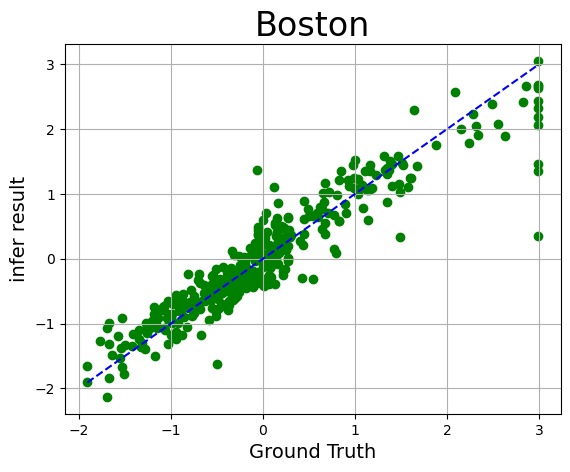

In [274]:
# 绘制实际值 vs. 预测值
plt.scatter(y.numpy(), predictions, color='green', label='infer result')
plt.xlabel("Ground Truth", fontsize=14)
plt.ylabel("infer result", fontsize=14)
plt.title("Boston", fontsize=24)
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='blue', linestyle='--')
plt.grid()
plt.show()

## 正规方程求解 $θ=(𝑋^𝑇 𝑋)^{−1} 𝑋^𝑇 𝑌$

首先将x扩维，沿第二个轴，添加一列全1向量

In [275]:
ones = np.ones((X.shape[0], 1))
X = np.concatenate([X, ones], axis=1)
X = torch.tensor(X)
print(X)

tensor([[-0.3983,  0.4565, -0.7699,  ...,  0.3559,  0.8140,  1.0000],
        [-0.4085,  0.5853, -0.8764,  ...,  0.4411, -0.4812,  1.0000],
        [-0.4083,  1.2291, -0.6897,  ...,  0.3572, -0.9256,  1.0000],
        ...,
        [-0.4029, -0.4877, -0.1644,  ...,  0.4148, -0.3298,  1.0000],
        [-0.3938, -0.4877, -0.6167,  ...,  0.3954,  0.8616,  1.0000],
        [-0.4043, -0.4877, -1.0340,  ...,  0.4411,  0.2855,  1.0000]],
       dtype=torch.float64)


计算w，提示函数：torch.mm(), torch.linalg.inv()   {torch框架} 
或者np.dot(),np.linalg.inv()                    {Numpy框架}

In [276]:
w = torch.matmul(torch.matmul(torch.linalg.inv(torch.matmul(X.T,X)),X.T),y)

计算预测值predict

In [277]:
predict = X @ w
print(predict)

tensor([[-9.7839e-01],
        [-1.6290e-01],
        [ 1.3849e+00],
        [-3.5057e-01],
        [-1.0463e+00],
        [-9.4670e-01],
        [ 1.4789e-02],
        [-9.0246e-01],
        [ 9.4769e-01],
        [ 2.9841e-01],
        [-8.0533e-01],
        [ 1.8926e-01],
        [-1.4633e+00],
        [-8.3925e-01],
        [-1.6557e-01],
        [ 1.1365e+00],
        [ 5.9087e-01],
        [ 3.5150e-01],
        [-7.5873e-01],
        [ 9.3046e-01],
        [ 6.0624e-01],
        [-9.5086e-01],
        [-1.6478e+00],
        [ 6.4741e-01],
        [ 3.1314e-01],
        [-1.9799e+00],
        [ 6.4732e-01],
        [-5.8390e-01],
        [ 7.5798e-01],
        [-2.4177e-01],
        [-7.1591e-01],
        [-5.1392e-01],
        [-1.0714e+00],
        [-1.5328e+00],
        [-3.5334e-01],
        [ 1.2978e+00],
        [ 1.1362e+00],
        [ 1.1396e-01],
        [-3.1554e-01],
        [ 4.6085e-02],
        [ 4.7082e-01],
        [-8.2342e-02],
        [-6.0894e-01],
        [ 1

画图显示

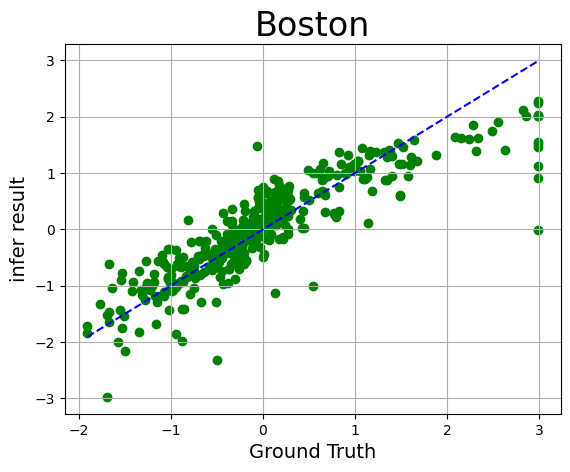

In [278]:
plt.scatter(y.numpy(), predict, color='green', label='infer result')
plt.xlabel("Ground Truth", fontsize=14)
plt.ylabel("infer result", fontsize=14)
plt.title("Boston", fontsize=24)
plt.plot([min(y.numpy()), max(y.numpy())], [min(y.numpy()), max(y.numpy())], color='blue', linestyle='--')
plt.grid()
plt.show()

# 附加练习
对损失函数添加L2/L1正则化项。提示：利用model.parameters() 获取参数的值，将正则化项损失加到loss上进行优化。结合正常优化代码输出优化结果及示意图。

Epoch [9/1000], Step [100], Loss: 0.4054
Epoch [17/1000], Step [200], Loss: 0.5889
Epoch [25/1000], Step [300], Loss: 0.3462
Epoch [34/1000], Step [400], Loss: 0.3771
Epoch [42/1000], Step [500], Loss: 0.3569
Epoch [50/1000], Step [600], Loss: 0.7610
Epoch [59/1000], Step [700], Loss: 0.3384
Epoch [67/1000], Step [800], Loss: 0.3628
Epoch [75/1000], Step [900], Loss: 0.3542
Epoch [84/1000], Step [1000], Loss: 0.5844
Epoch [92/1000], Step [1100], Loss: 0.5784
Epoch [100/1000], Step [1200], Loss: 0.3986
Epoch [109/1000], Step [1300], Loss: 0.3578
Epoch [117/1000], Step [1400], Loss: 0.3396
Epoch [125/1000], Step [1500], Loss: 0.3325
Epoch [134/1000], Step [1600], Loss: 0.5443
Epoch [142/1000], Step [1700], Loss: 0.7905
Epoch [150/1000], Step [1800], Loss: 0.6011
Epoch [159/1000], Step [1900], Loss: 0.3561
Epoch [167/1000], Step [2000], Loss: 0.6099
Epoch [175/1000], Step [2100], Loss: 0.4495
Epoch [184/1000], Step [2200], Loss: 0.3456
Epoch [192/1000], Step [2300], Loss: 0.4088
Epoch [20

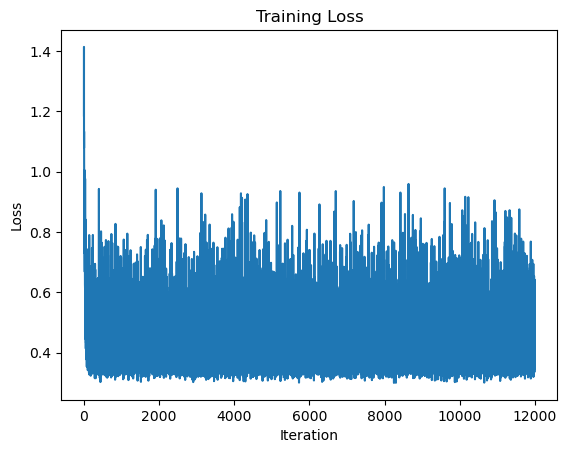

In [279]:
# 加载模型
model = torch.load('model1.pth')

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 创建一个StepLR调度器
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)

# L1正则化和L2正则化的权重
l1_lambda = 0.05
l2_lambda = 0.001

# 训练循环
num_epochs = 1000
iters, train_costs = [], []

for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        # 前向传播
        y_pred = model(batch_X.float())
        # 计算loss
        loss = criterion(y_pred, batch_y.float())

        # 添加L1和L2正则化
        l1_norm = sum(p.abs().sum() for p in model.parameters())
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l1_lambda * l1_norm + l2_lambda * l2_norm

        # 反向传播和优化：(1) 梯度归零
        optimizer.zero_grad()
        #               (2) 反向传播计算每个参数的梯度
        loss.backward()
        #               (3) 通过梯度下降更新参数
        optimizer.step()

        train_costs.append(loss.item())

        # 打印输出训练进度
        if len(train_costs) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{len(train_costs)}], Loss: {loss.item():.4f}")
        # 在每个epoch结束后，调用scheduler的step方法来降低学习率
        scheduler.step()
# 绘制训练损失
import matplotlib.pyplot as plt

plt.plot(train_costs)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()
